Необходимо провести чистку/восстановление признаков и отдельных экземпляров.  
Использовать тепловую матрицу для удаления сильно зависимых признаков, найти и выбрать наиболее важные для настройки модели признаки посредством алгоритма Gain Ratio (коэффициент усиления) из алгоритма классификации с помощью деревьев решений C4.5. Рассказать о проделанной работе и обосновать каждое преобразование датасета. За основу берём датасет с данными о ценах на лаптопы.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("Laptop_price.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [25]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [26]:
num_cols = df.select_dtypes([np.number]).columns

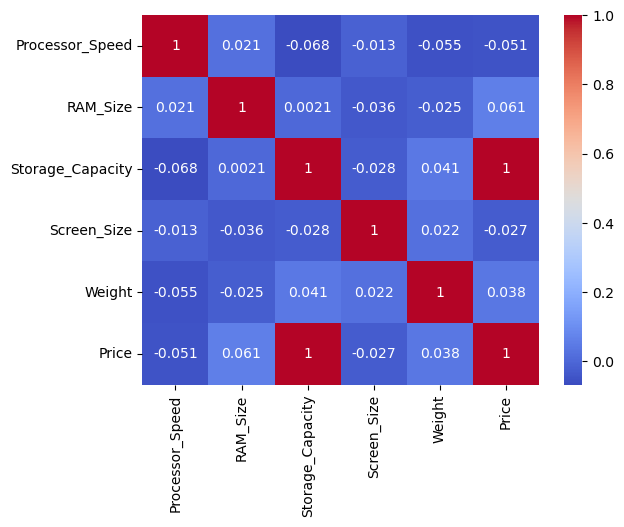

In [27]:
# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


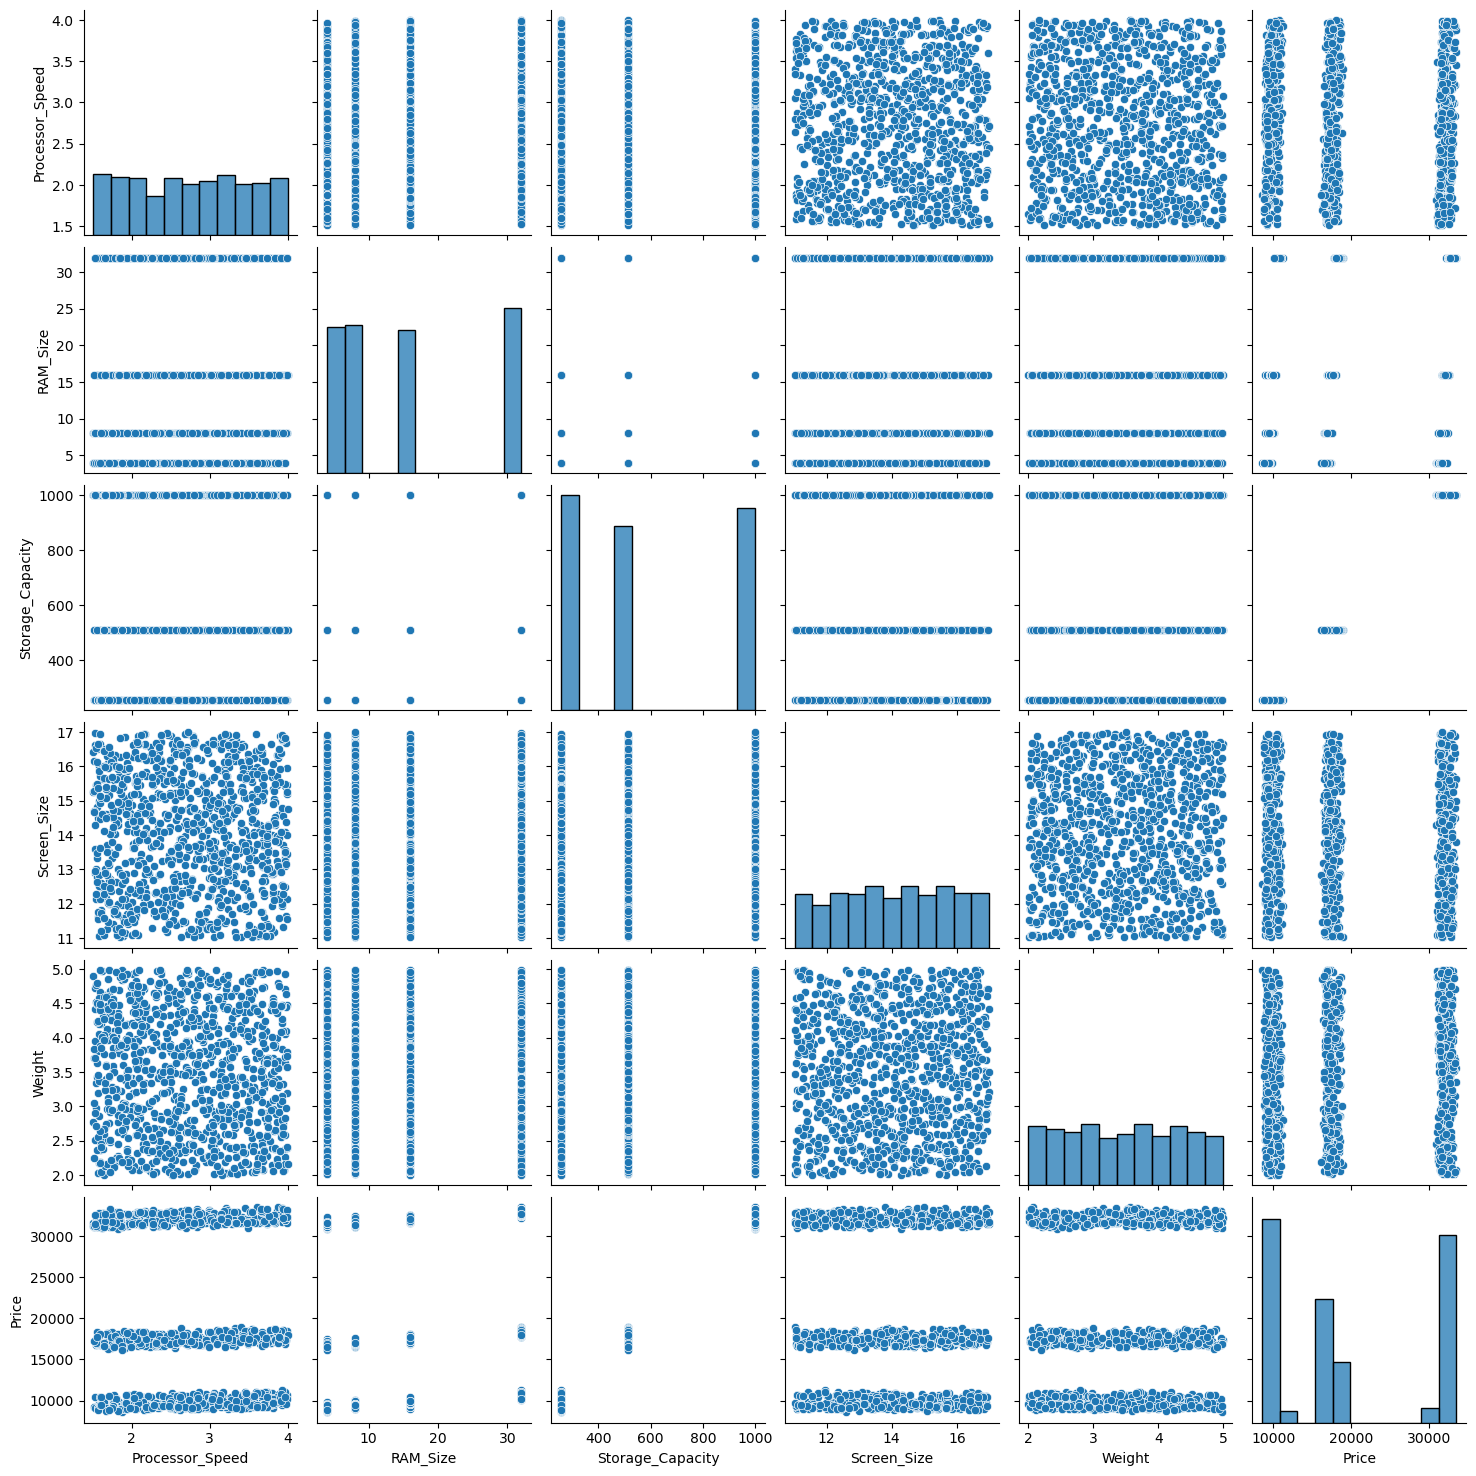

In [28]:
sns.pairplot(df)

In [29]:
# Замена NAN значений на среднее (в нашем случае NAN нет)
df = df.fillna(df.mean(numeric_only=True))

In [30]:
# Убрать дупликаты 
df = df.drop_duplicates()

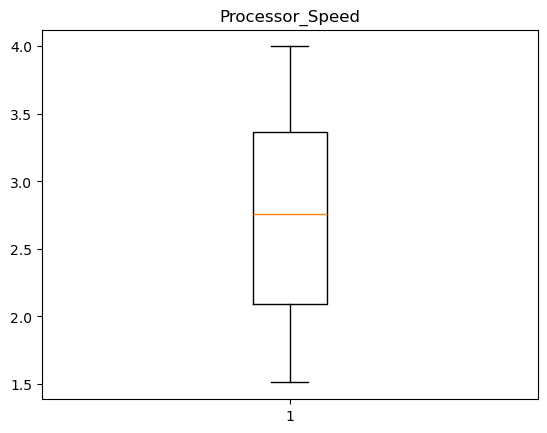

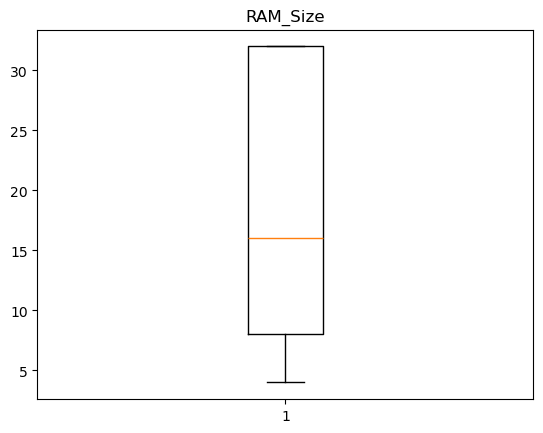

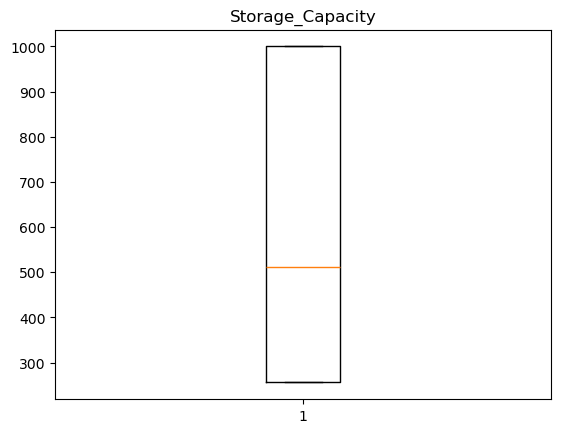

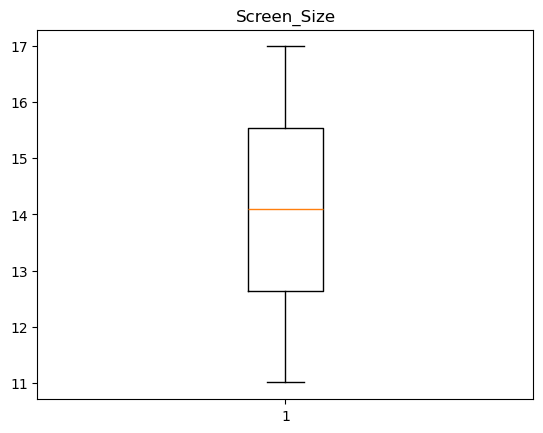

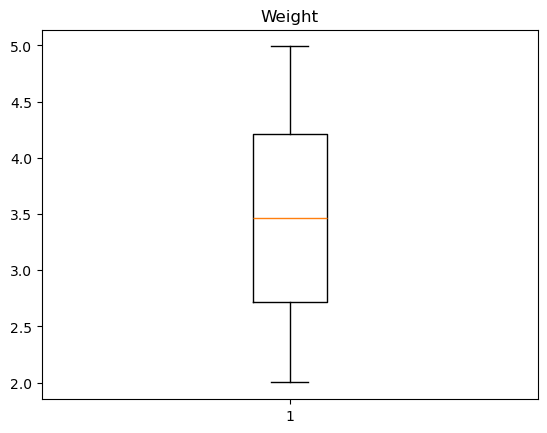

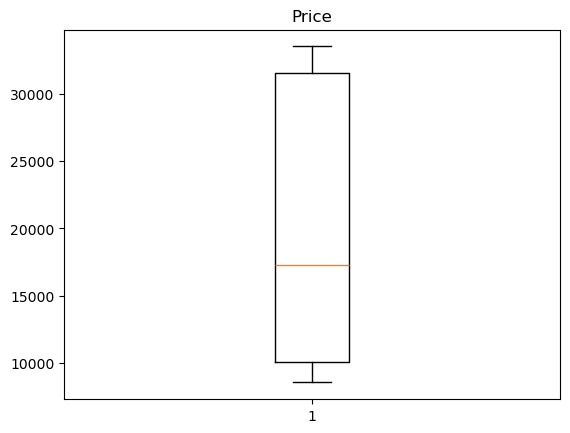

In [31]:
# Проверить выборсы 
for dc in num_cols:
    plt.title(dc)
    plt.boxplot(x=df[dc])
    plt.show()


In [32]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [33]:
# TODO:  ручная heat map и gain ratio

In [34]:
def covar(x,y):
    return (np.sum(np.multiply(x - x.mean(), y - y.mean())) / (x.shape[0]-1))

def std(x):
    return np.sqrt(np.sum((x-x.mean())**2) / x.shape[0])

def corr(x,y):
    return (covar(x,y) / (std(x) * std(y)))

In [35]:
def corr_mat(df):
    dict = {}
    for i in df.columns:
        dict[i] = []
        for j in df.columns:
            dict[i].append(corr(df[i],df[j]))

    return pd.DataFrame(dict,columns = df.columns, index = df.columns)

In [36]:
handmade_cm = corr_mat(df[num_cols])

<Axes: >

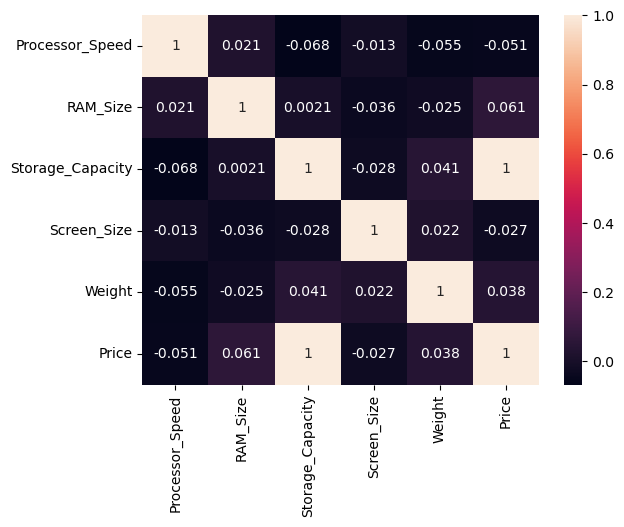

In [37]:
sns.heatmap(handmade_cm, annot=True)

In [38]:
df['Price'] = pd.cut(df['Price'], bins = [0,20000,33000,35000], labels = ['low','medium','high'])

In [39]:
def entropy(X):
    return -(sum((x / X.shape[0]) * (np.log2(x / X.shape[0])) for x in X.value_counts().loc[lambda y : y > 0]))
def info_gain(X, y):
    return entropy(y) - sum((X[X == x].shape[0] / X.shape[0]) * entropy(y[X == x]) for x in X.unique())
def gain_ratio(X, y):
    return (info_gain(X, y) / entropy(X))

In [40]:
x = df.drop('Price', axis = 1)
y = df['Price']


In [42]:
gain_ratio(df['Screen_Size'],y)

0.10601213450835735